<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Aaron_Huizenga_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [107]:
## I am going to use the !wget function to read the data in

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-04-14 23:50:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-04-14 23:50:10 (287 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [109]:
votes2 = votes
votes2 = votes2.replace({'?':np.NaN})
votes = votes.replace({'y':1, 'n':0, '?':np.NaN})
votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [110]:
rep = votes[votes['party'] == 'republican']
dem = votes[votes['party'] == 'democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [111]:
rep = rep.drop(['party'], axis=1)
dem = dem.drop(['party'], axis=1)
rep.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [112]:
dem.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [113]:
rep.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [114]:
rep_infants = rep['handicapped-infants']
rep_infants = rep_infants.dropna()
rep_infants.head()

0     0.0
1     0.0
7     0.0
8     0.0
10    0.0
Name: handicapped-infants, dtype: float64

###1. Generate and numerically represent a confidence interval.

By providing the full analysis with a confidence interval can be a helpful and powerful way to tell your story. If one does it right and does it well, it's more descriptive than just saying you fail to reject the null hypothesis. What it actually does, is show that the data won't give a clear result, or in this case the point estimate, but rather a much larger and broder range of possibilities that exist.

One might ask how the interval is created and what is it supposed to look like? Simply put, it doesn't mean that 95% of the data won't be found within the data frame created. What you should expect is an interpretation, that if one were to repeat the test 100 times, what we would get in return is an average result   - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to fall within the data frame 95 times.

For a 95% confidence interval and a normalized, it is very important to remember that +/-2 deviations contain roughly 95% probability, so the center mean will be based on this example or in this case, the point estimate.

If you bring into the equation of different assumptions, it will require different math, even though the interpretation will be the same.

In [0]:
## The following groups of code will allow me to eventually created the 
## confidence interval. While I'm sure I'm taking the long way around the block, 
## I wouldn't mind learning a shorter and easier approach. So I will code in an
## interval function

def confidence_interval (data, confidence = 0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
test = np.array(rep_infants)

In [117]:
# Generate confidence interval for Republicans' votes about infants
mean, upper, lower = confidence_interval(rep_infants)
print(mean)
print(upper)
print(lower)

0.18787878787878787
0.12765166444807918
0.24810591130949655


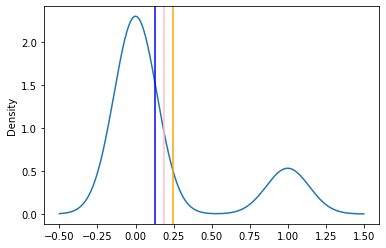

In [118]:
# Since matplotlib was already imported I will use the function to come up 
# with a graphic display to represent the confidence interval

import matplotlib.pyplot as plt

ci = confidence_interval(rep_infants)
rep_infants.plot.density()
plt.axvline(x=ci[2], color='orange')
plt.axvline(x=ci[0], color='pink')
plt.axvline(x=ci[1], color='blue')
plt.show()

In [119]:
## The following code will return a column and header for both parties

repubs = df.loc[df["party"]=="republican"].drop(["party"],axis=1).dropna() 
democrats = df.loc[df["party"]=="democrat"].drop(["party"],axis=1).dropna() 

h(repubs),h(democrats)

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


(108, 16)

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


(124, 16)

(None, None)

In [120]:
## This is where the confidence intervals come into play. It really does help 
## watching the videos or previous lectures multiple times along with multiple 
## pages of notes. I would have never gotten this far if I hadn't done that.

''' Not sure if I can do this in the same cell on different lines and get the 
    same result, so I will run both the Dem and Rep parties in different 
    cells. '''

# Generate confidence interval for Republicans' votes about infants
mean, upper, lower = confidence_interval(rep_infants)
print(mean)
print(upper)
print(lower)

0.18787878787878787
0.12765166444807918
0.24810591130949655


In [0]:
d_confs = {}
for column in democrats:
    d_confs.update ({ column : confidence_interval(democrats[column]) })

In [0]:
r_confs = {}
for column in repubs:
    r_confs.update ({ column : confidence_interval(repubs[column]) })

In [127]:
for key, value in r_confs.items():
  print(key, value)

handicapped-infants (0.21296296296296297, 0.13450349074958223, 0.2914224351763437)
water-project (0.4722222222222222, 0.3765480931771919, 0.5678963512672525)
budget (0.1574074074074074, 0.08761355698812177, 0.22720125782669304)
physician-fee-freeze (0.9907407407407407, 0.9723853391655276, 1.009096142315954)
el-salvador-aid (0.9537037037037037, 0.913434261310743, 0.9939731460966644)
religious-groups (0.8703703703703703, 0.8059979340740583, 0.9347428066666824)
anti-satellite-ban (0.26851851851851855, 0.18358393802160433, 0.35345309901543276)
aid-to-contras (0.14814814814814814, 0.08006715123831286, 0.2162291450579834)
mx-missile (0.1388888888888889, 0.07261245914426012, 0.20516531863351767)
immigration (0.5740740740740741, 0.4793093369789436, 0.6688388111692045)
synfuels (0.1574074074074074, 0.08761355698812177, 0.22720125782669304)
education (0.8518518518518519, 0.7837708549420166, 0.9199328487616871)
right-to-sue (0.8425925925925926, 0.7727987421733069, 0.9123864430118782)
crime (0.981

In [123]:
for key, value in d_confs.items():
  print(key, value)

handicapped-infants (0.5887096774193549, 0.5008854514528094, 0.6765339033859004)
water-project (0.45161290322580644, 0.3627917755681809, 0.540434030883432)
budget (0.8548387096774194, 0.791966749899413, 0.9177106694554258)
physician-fee-freeze (0.04838709677419355, 0.01008836071171925, 0.08668583283666784)
el-salvador-aid (0.20161290322580644, 0.13000591391201893, 0.27321989253959394)
religious-groups (0.4435483870967742, 0.3548790007497182, 0.5322177734438303)
anti-satellite-ban (0.7661290322580645, 0.6905800506734978, 0.8416780138426312)
aid-to-contras (0.8306451612903226, 0.7637035637475735, 0.8975867588330717)
mx-missile (0.7903225806451613, 0.7176672431336555, 0.862977918156667)
immigration (0.532258064516129, 0.44320399355877216, 0.6213121354734858)
synfuels (0.5080645161290323, 0.41883613678222775, 0.5972928954758367)
education (0.12903225806451613, 0.06919940918552969, 0.18886510694350256)
right-to-sue (0.2903225806451613, 0.2093085202865504, 0.3713366410037722)
crime (0.346774

##2 - Represent the confidence interval with a graphic plot

<Figure size 432x288 with 0 Axes>

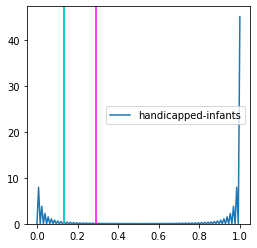

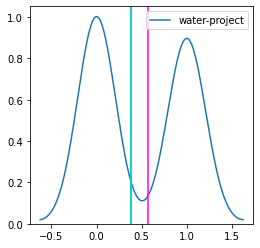

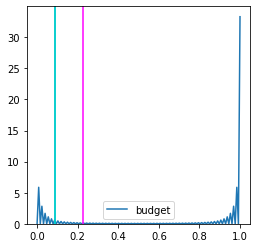

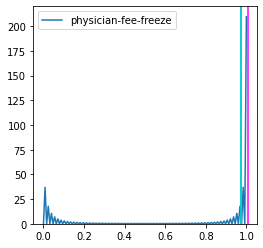

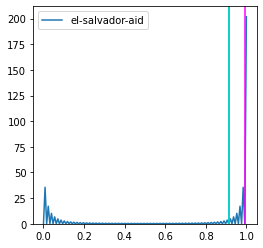

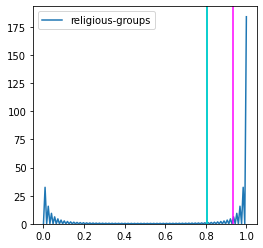

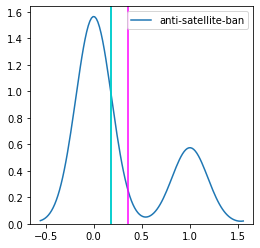

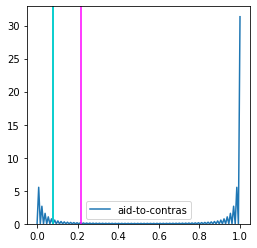

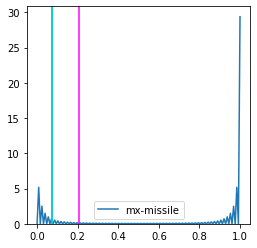

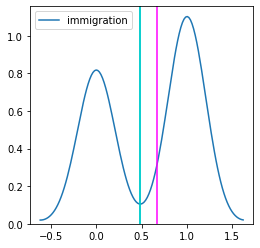

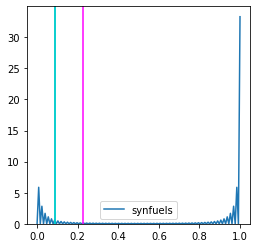

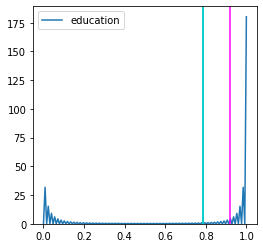

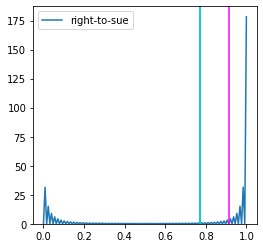

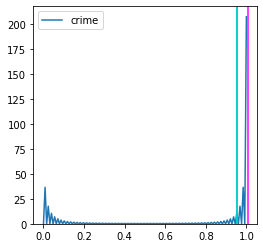

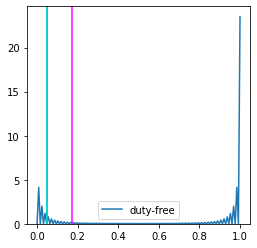

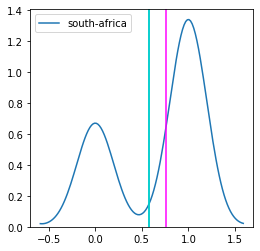

In [128]:
## I googled how to be able to plot multiple confidence intervals. I still cannot
## get rid of the tag line even with the plt.show()
## On the first x=inter[1] it was originally a 3 but said it was out of range
## so I switched it to 1

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for key,value in repubs.items():
    fig, ax = plt.subplots(figsize=(4,4))
    sns.kdeplot(value)
    inter = confidence_interval(value)
    plt.axvline(x=inter[2], color='magenta')
    plt.axvline(x=inter[1], color='black')
    plt.axvline(x=inter[1], color='cyan')

    plt.show();

<Figure size 432x288 with 0 Axes>

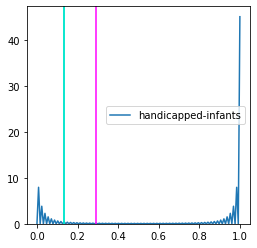

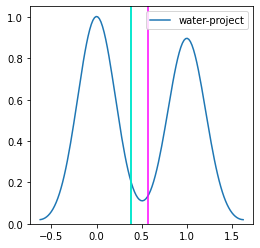

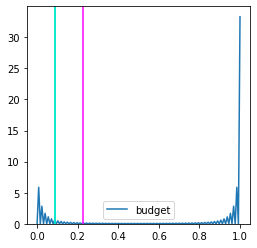

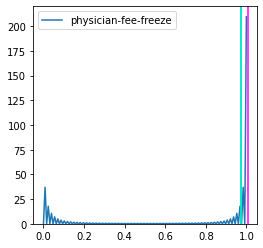

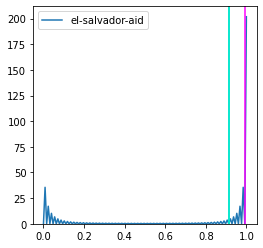

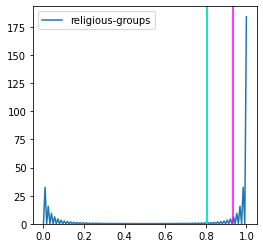

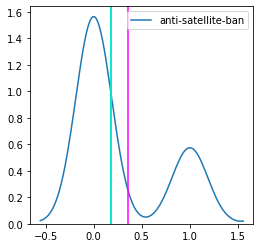

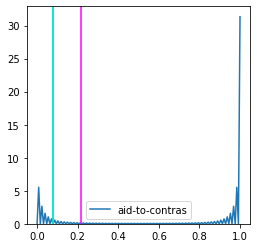

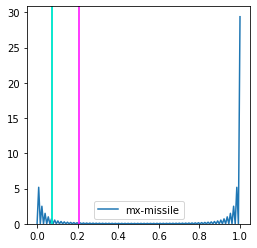

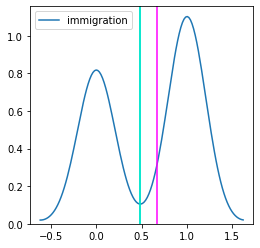

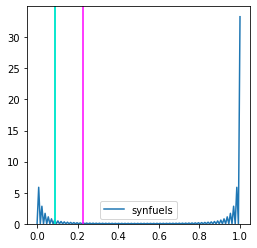

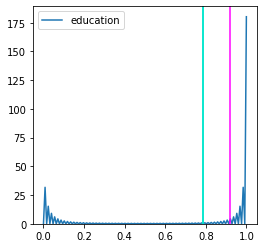

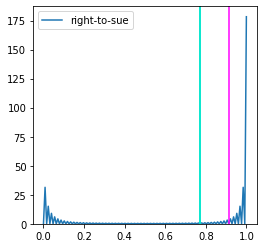

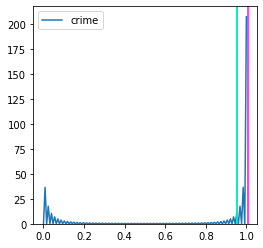

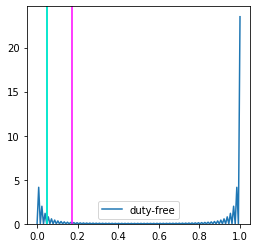

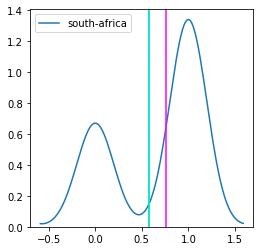

In [129]:
## The same thing happened with this section of code being out of range
## Again all I did differently was switch the 3 to a 1 and it works fine

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for key,value in repubs.items():
    fig, ax = plt.subplots(figsize=(4,4))
    sns.kdeplot(value)
    inter = confidence_interval(value)
    plt.axvline(x=inter[2], color='magenta')
    plt.axvline(x=inter[1], color='green')
    plt.axvline(x=inter[1], color='cyan')

    plt.show();

IndexError: ignored

<Figure size 432x288 with 0 Axes>

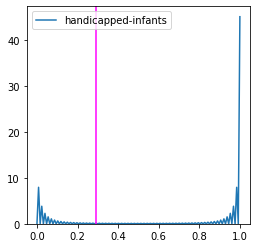

In [89]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for key,value in repubs.items():
    fig, ax = plt.subplots(figsize=(4,4))
    sns.kdeplot(value)
    inter = confidence_interval(value)
    plt.axvline(x=inter[2], color='magenta')
    plt.axvline(x=inter[3], color='green')
    plt.axvline(x=inter[1], color='cyan')

    plt.show();

#Chi-squared tests: Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data By hand using Numpy In a single line using Scipy

In [130]:
votes2

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [131]:
## I took the lecture notes and watched a simple video on the chi2 test and this
## is what I came up with. I hope I have it right

observed_frequencies = pd.crosstab(votes2['party'], votes2['handicapped-infants'], margins=True)
observed_frequencies

handicapped-infants,n,y,All
party,,,
democrat,102,156,258
republican,134,31,165
All,236,187,423


In [132]:
observed = pd.crosstab(votes2['party'], votes2['handicapped-infants'])
observed = observed.values
observed

array([[102, 156],
       [134,  31]])

In [133]:
row_sums = observed_frequencies.iloc[0:2, 2:].values
row_sums = row_sums.T[0]
row_sums

array([258, 165])

In [134]:
col_sums = observed_frequencies.iloc[2:, 0:2].values
col_sums = col_sums[0]
col_sums

array([236, 187])

In [135]:
total_total = observed_frequencies['All'].values[2]
total_total

423

In [136]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[143.94326241 114.05673759]
 [ 92.05673759  72.94326241]]


In [137]:
chi2 = ((observed-expected)**2 / expected).sum()
chi2

70.87421431649699

In [138]:
## The assignment asks for us to verify with Scipy

chi2_compare, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi2_compare)

69.19452205439228


In [139]:
stats.chisquare(observed, expected)

Power_divergenceResult(statistic=array([31.33209947, 39.54211484]), pvalue=array([2.17454411e-08, 3.21060181e-10]))

In [140]:
# This should sum it all up using this code to verify using scipy

chi2 - chi2_compare

1.6796922621047088

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

##*Un-biased Summary of Findings*

First - Trying to be as non-biased as possible. When I look at both parties and the intervals created between the two parties, from the naked eye it would appear that the Republicans voted more independtently than the Democrats who appeared to vote more as a party. Whether that is for individual gain or not is left to be desired.

Second and lastly - I am left wondering why it appears there is more of a variance on the Republican side rather than the Democratic side after running a variance on the margins. Not sure what else I can do to clear up the confusion, but it would definitely be worth one exploring.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)